# 1. Be the right person ..

In [4]:
import sys
sys.path.append('../src')
from data_loading import *
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

```python
data_2018 = YearLoader(2018)
data_2018.get_dataframe("characteristics")
data_2018.get_dataframe("locations")
data_2018.get_dataframe("passengers")
data_2018.get_dataframe("vehicles")
```

## Population Pyramids (driver)

In [5]:
# Load dataset
data_2018 = YearLoader(2018)
# Check if nan in an_nais
print(np.unique(YearLoader(2018).get_dataframe("passengers")['an_nais'].values))

[1911. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926.
 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938.
 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950.
 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962.
 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974.
 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986.
 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998.
 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010.
 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan]


In [8]:
def get_dead_alive_gender_df(data):
    """Create a DataFrame (male_dead, male_alive, female_dead, female_alive) for each age group.

    If the age can't be computed or age is greater than 150 years old, age_group is '?'.

    Parameters
    ----------
    data : YearLoader
        Dataset loading class.

    Returns
    -------
    pandas.DataFrame
        Dead/Alive count for each age-group and gender

    """
    # Load passengers dataset
    passengers = data.get_dataframe("passengers")
    year = data.year
    
    
    # Compute dead/alive for female/male
    passengers['male_dead'] = passengers.apply(lambda x: 1 if x.grav==2 and x.sexe==1 else 0, axis=1)
    passengers['male_alive'] = passengers.apply(lambda x: 1 if x.grav!=2 and x.sexe==1 else 0, axis=1)
    passengers['female_dead'] = passengers.apply(lambda x: 1 if x.grav==2 and x.sexe==2 else 0, axis=1)
    passengers['female_alive'] = passengers.apply(lambda x: 1 if x.grav!=2 and x.sexe==2 else 0, axis=1)
    
    # Compute age
    passengers['age_group'] = passengers.apply(lambda x: 15 if math.isnan(x.an_nais) else int((year - x.an_nais)//10), axis=1)
    pyramid_data = passengers[['male_dead', 'male_alive', 'female_dead', 'female_alive', 'age_group']]
    
    pyramid_data = pyramid_data.groupby(['age_group']).sum(axis=1).sort_values('age_group')#.drop('sort', axis=1)
    pyramid_data.reset_index(level=0, inplace=True)
    # Age categorie to age group
    pyramid_data['age_group'] = pyramid_data.apply(lambda x : '?' if x.age_group ==15 else str(x.age_group)+'0-'+str(x.age_group+1)+'0', axis=1)
    
    return pyramid_data
    
pyramid_data = get_dead_alive_gender_df(data_2018)
pyramid_data

,age_group,male_dead,male_alive,female_dead,female_alive
0,00-10,34,2283,25,1695
1,10-20,201,9258,59,4614
2,20-30,582,21350,116,9552
3,30-40,395,16570,77,6990
4,40-50,361,13621,67,5832
5,50-60,364,11273,73,5177
6,60-70,261,6086,92,3514
7,70-80,196,3238,103,2281
8,80-90,174,1636,136,1312
9,90-100,46,260,29,197


In [9]:
pyramid_data.sum()

age_group       00-1010-2020-3030-4040-5050-6060-7070-8080-909...
male_dead                                                    2615
male_alive                                                  85603
female_dead                                                   777
female_alive                                                41174
dtype: object

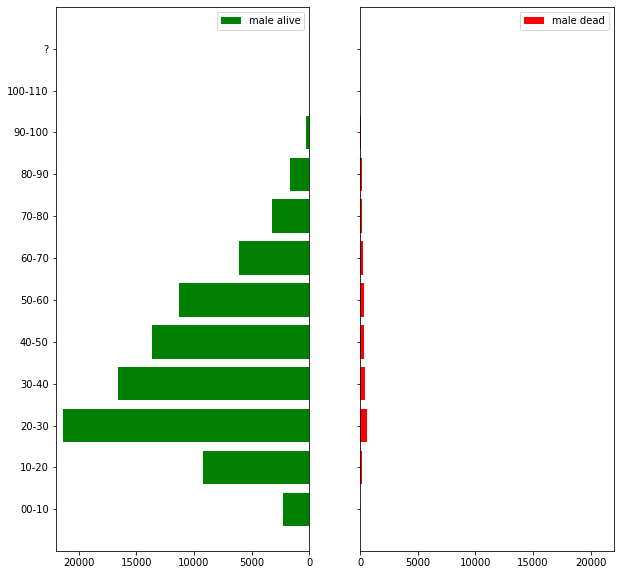

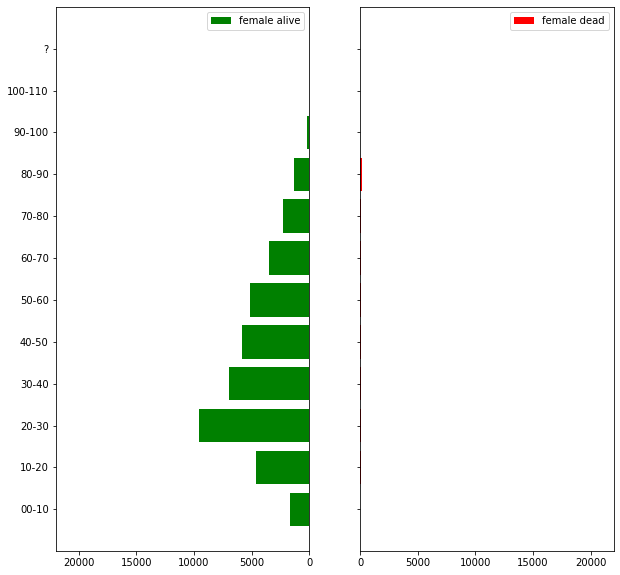

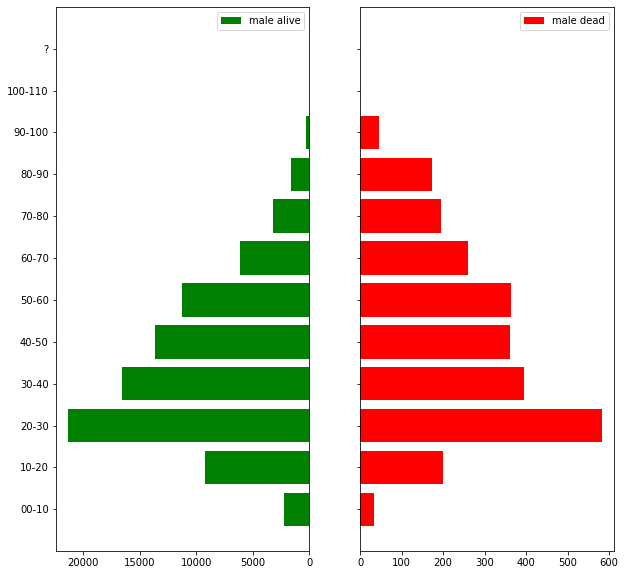

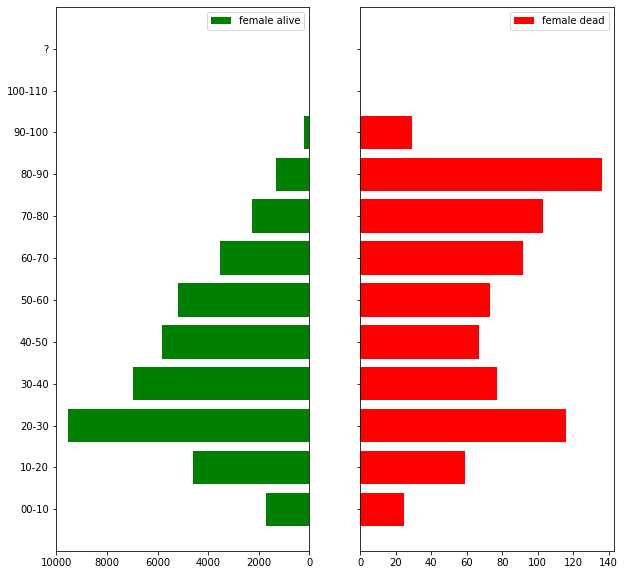

In [10]:
def plot_pyramid_dead_alive_gender(df, female=False, male=True, figsize=(10,10), xlim = None):
    """Plot population pyramid (male_dead, male_alive, female_dead, female_alive) for each age group.

    Parameters
    ----------
    df : pandas.DataFrame
        pyramid_data (get_dead_alive_gender_df() function).
    female : bool
        show female plot.
    male : bool
        show male plot.
    figsize : tuple
        (x, y) figsize for plots.
    xlim : tuple
        (min,max) x axis limits.
    """

    if male:
        fig_male, axes_male = plt.subplots(ncols=2, sharey=True, figsize=figsize)
        axes_male[0].barh(df['age_group'], df['male_alive'], align='center', color='green')
        axes_male[1].barh(df['age_group'], df['male_dead'], align='center', color='red')
        axes_male[0].set_xlim(xlim)
        axes_male[1].set_xlim(xlim)
        axes_male[0].invert_xaxis()
        axes_male[0].legend(['male alive'])
        axes_male[1].legend(['male dead'])
        plt.show()
        
    if female:
        
        fig_female, axes_female = plt.subplots(ncols=2, sharey=True, figsize=figsize)
        axes_female[0].barh(df['age_group'], df['female_alive'], align='center', color='green')
        axes_female[1].barh(df['age_group'], df['female_dead'], align='center', color='red')
        axes_female[0].set_xlim(xlim)
        axes_female[1].set_xlim(xlim)
        axes_female[0].invert_xaxis()
        axes_female[0].legend(['female alive'])
        axes_female[1].legend(['female dead'])

        plt.show()

plot_pyramid_dead_alive_gender(pyramid_data, male=True, female=True, xlim= (0,22000))
plot_pyramid_dead_alive_gender(pyramid_data, male=True, female=True, xlim= None)

## Types of vehicles

In [11]:
def get_vehicles_type_df(data):
    """Create a DataFrame (catv).

    Count number of vehicles per category

    Parameters
    ----------
    data : YearLoader
        Dataset loading class.

    Returns
    -------
    pandas.DataFrame
        Vehicles categories count DataFrame.

    """
    
    # Get vehicles DataFrame
    vehicles = data.get_dataframe("vehicles")
    
    # Count vehicles per category
    vehicles_cat = pd.DataFrame(vehicles['catv'].value_counts())
    
    return vehicles_cat

vehicles_2018_cat = get_vehicles_type_df(data_2018)
vehicles_2018_cat

,catv
7,60384
33,8277
10,6390
1,4967
2,3967
30,2740
31,2479
32,2002
34,1781
15,971


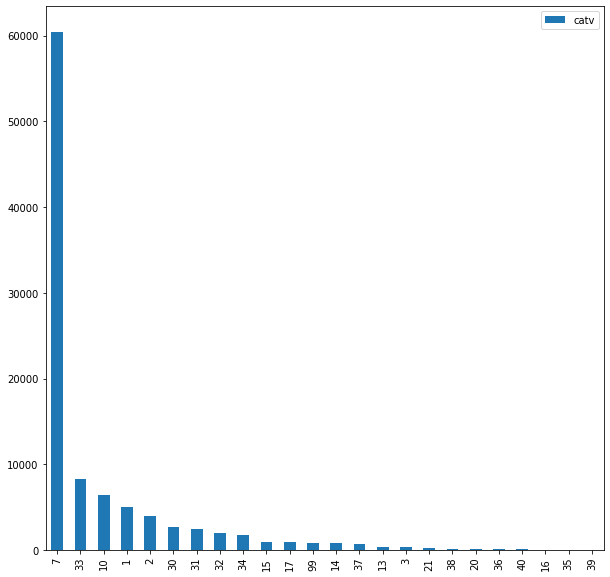

In [12]:
def plot_vehicles_cat(df, figsize=(10,10)):
    """Bar plot number of vehicle per category.


    Parameters
    ----------
    df : pandas.DataFrame
         vehicle per category count DataFrame (get_vehicles_type_df() function).

    """
    df.plot(kind='bar', figsize=figsize)
    plt.show()
    
plot_vehicles_cat(vehicles_2018_cat)